<a href="https://colab.research.google.com/github/IJSK10/Analyzing-Classification-and-Feature-Selection-Strategies-for-Diabetes-Prediction/blob/main/Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
string_to_int= preprocessing.LabelEncoder()
import matplotlib.pyplot as pyplot

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from lime.lime_tabular import LimeTabularExplainer
import shap

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=edb475ccf60585a976322925e56f4e490c9d6cd1ae2e4e4a8e1fd7db7cc4808d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.0 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv("/content/Diabetes-2.csv")

In [ ]:
#pre processing
X1 = data.drop(columns=['diabetes'])
M=data['diabetes']
print(X1)
data=data.apply(string_to_int.fit_transform)
print(data)
X = data.drop(columns=['diabetes'])
y = data['diabetes']

      gender  age  hypertension  heart_disease  smoking_history  bmi  \
0          0   94             0              1                4  367   
1          0   68             0              0                0  468   
2          1   42             0              0                4  468   
3          0   50             0              0                1  282   
4          1   90             1              1                1  152   
...      ...  ...           ...            ...              ...  ...   
1494       1   29             0              0                0  296   
1495       1    5             0              0                0  117   
1496       0   76             0              0                4  668   
1497       1   73             0              0                3  576   
1498       1   68             0              0                0  710   

      HbA1c_level  blood_glucose_level  
0              11                    6  
1              11                    0  
2           

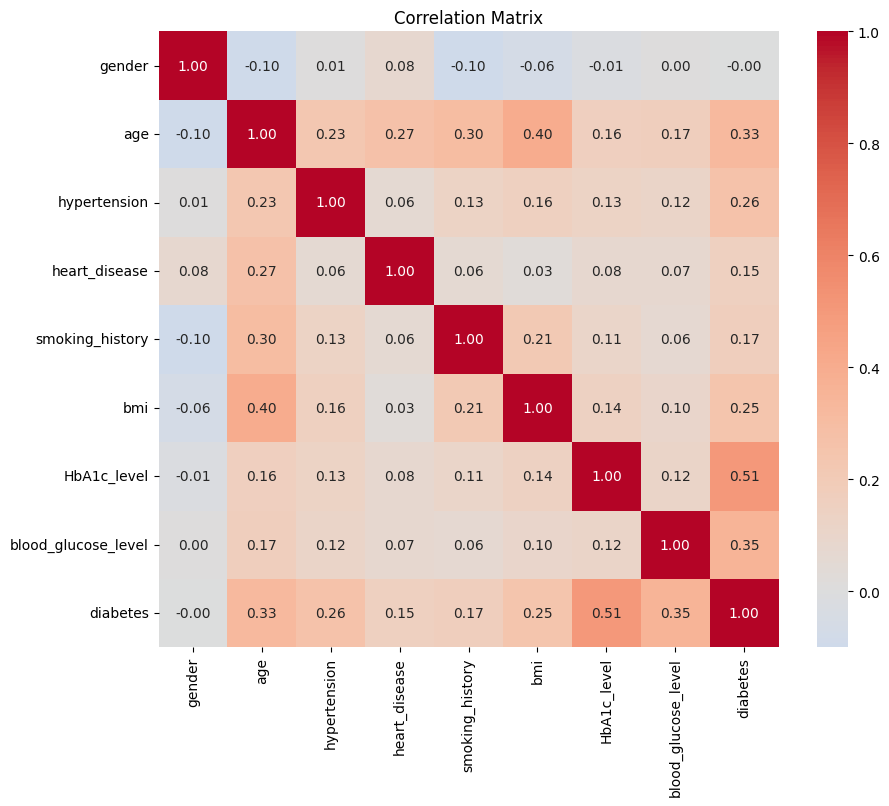

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

               Feature  Importance
6          HbA1c_level    0.385525
7  blood_glucose_level    0.268711
1                  age    0.137616
5                  bmi    0.116303
4      smoking_history    0.039646
2         hypertension    0.029070
0               gender    0.012728
3        heart_disease    0.010401


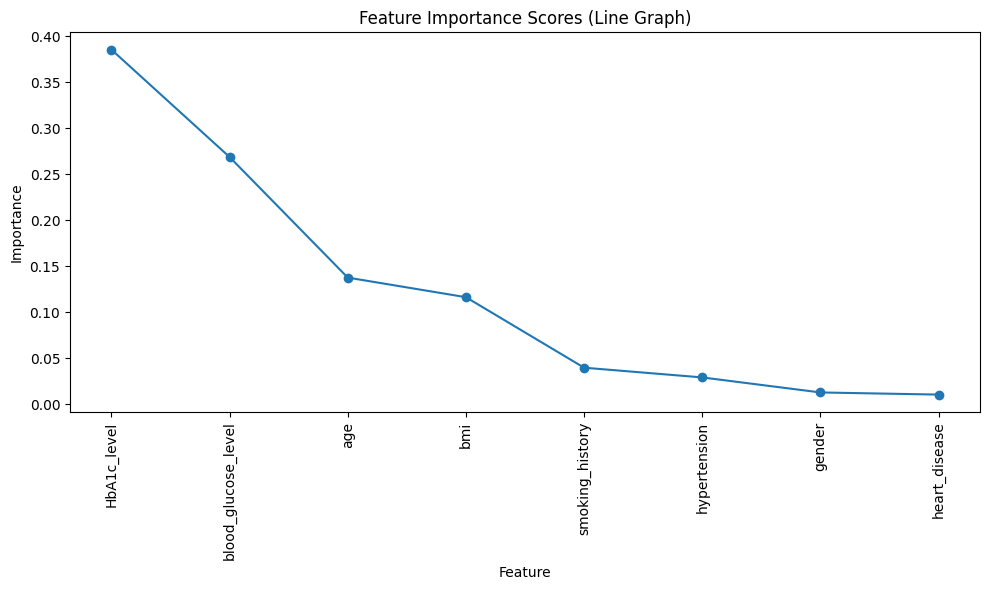

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
feature_importances1 = clf.feature_importances_
feature_importance_df1 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances1})
feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)
print(feature_importance_df1)
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df1['Feature'], feature_importance_df1['Importance'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores (Line Graph)')
plt.tight_layout()
plt.show()

               Feature  Importance
6          HbA1c_level    0.477997
7  blood_glucose_level    0.187672
2         hypertension    0.099275
1                  age    0.052899
3        heart_disease    0.051890
4      smoking_history    0.043813
0               gender    0.043687
5                  bmi    0.042765


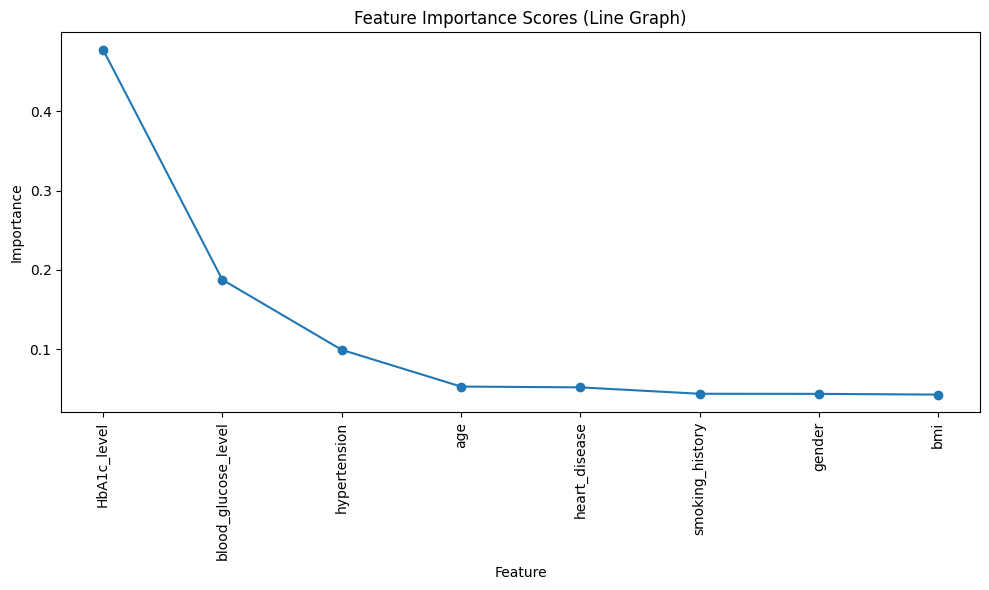

In [ ]:
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
feature_importances2 = model.feature_importances_
feature_importance_df2 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances2})
feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=False)
print(feature_importance_df2)
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df2['Feature'], feature_importance_df2['Importance'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores (Line Graph)')
plt.tight_layout()
plt.show()

               Feature  Importance
6          HbA1c_level    0.642901
7  blood_glucose_level    0.233966
1                  age    0.053320
5                  bmi    0.038716
2         hypertension    0.018634
4      smoking_history    0.008659
3        heart_disease    0.003101
0               gender    0.000703


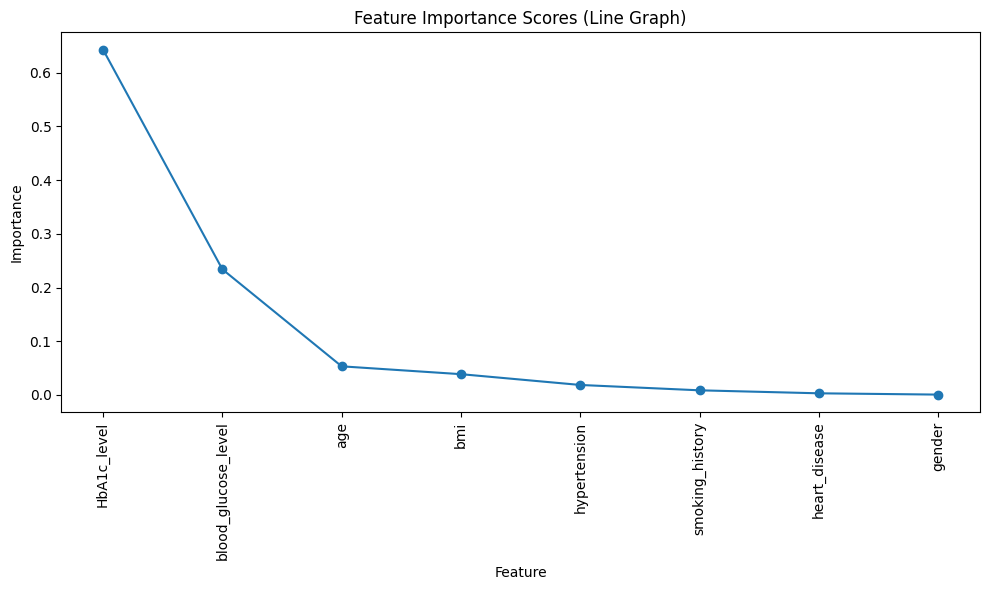

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
feature_importances3 = model.feature_importances_
feature_importance_df3 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances3})
feature_importance_df3 = feature_importance_df3.sort_values(by='Importance', ascending=False)
print(feature_importance_df3)
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df3['Feature'], feature_importance_df3['Importance'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores (Line Graph)')
plt.tight_layout()
plt.show()

HbA1c_level : 0.0059
age : 0.0050
blood_glucose_level : 0.0027
bmi : 0.0023
smoking_history : 0.0001
hypertension : 0.0000
heart_disease : 0.0000
gender : 0.0000


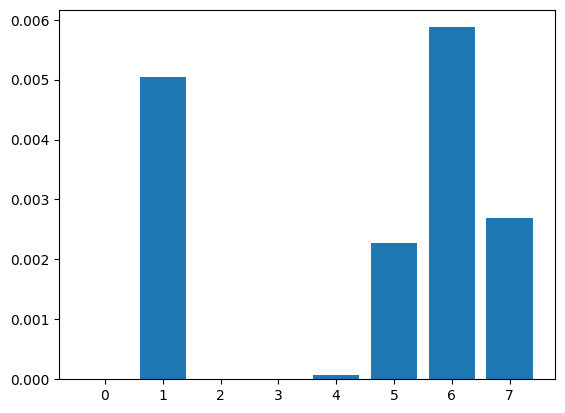

In [ ]:
model = SVR()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
l1=[]
# summarize feature importance
for i,v in enumerate(importance):
    l1=l1+[abs(v)]
zipped=zip(X.columns,l1)
zipped = list(zipped)

# Printing zipped list

# Using sorted and lambda
res = sorted(zipped, key = lambda x: x[1],reverse=True)

for feature, importances in res:
  print(f"{feature} : {importances:.4f}")

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
model = LinearRegression()

# Train the Linear Regression model on the training data
model.fit(X, y)

# Get the feature importances (coefficients)
feature_importances = model.coef_
feature_importances4 = model.coef_


zipped=zip(X.columns,abs(feature_importances))
zipped = list(zipped)

# Printing zipped list

# Using sorted and lambda
res = sorted(zipped, key = lambda x: x[1],reverse=True)

for feature, importance in res:
  print(f"{feature} : {importance:.4f}")

hypertension : 0.1600
heart_disease : 0.0936
HbA1c_level : 0.0349
blood_glucose_level : 0.0208
gender : 0.0125
smoking_history : 0.0057
age : 0.0019
bmi : 0.0001


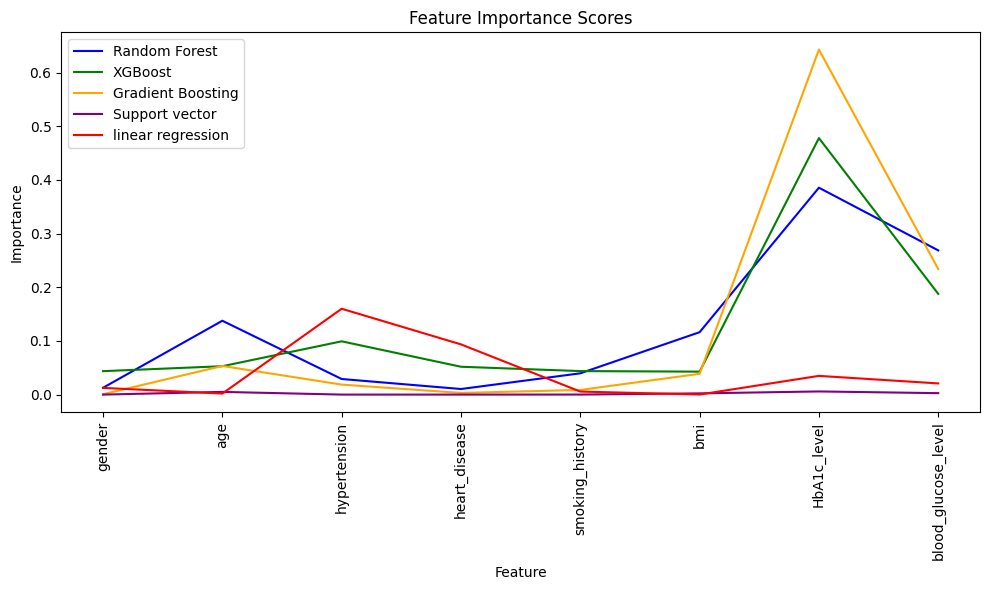

In [ ]:
plt.figure(figsize=(10, 6))

# Plot Random Forest scores in blue
plt.plot(X.columns, feature_importances1, color='blue', label='Random Forest')

# Plot XGBoost scores in green
plt.plot(X.columns, feature_importances2, color='green', label='XGBoost')

# Plot Gradient Boosting scores in orange
plt.plot(X.columns, feature_importances3, color='orange', label='Gradient Boosting')

plt.plot(X.columns, l1, color='purple', label='Support vector')

plt.plot(X.columns, feature_importances4, color='red', label='linear regression')

plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
#chisquare
k = 5
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)

print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [1 2 5 6 7]
age
hypertension
bmi
HbA1c_level
blood_glucose_level


In [ ]:
#fischer's score
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [1 2 5 6 7]
age
hypertension
bmi
HbA1c_level
blood_glucose_level


In [ ]:
#missing value
missing_threshold = 0.5
data1 = data[data.columns[data.isnull().mean() < missing_threshold]]
x = data.drop(columns=['diabetes'])
data=data.apply(string_to_int.fit_transform)
q = data['diabetes']
k =5
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(x, q)

# Get the indices of selected features
selected_indices = selector.get_support(indices=True)

# Print the indices of selected features
print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [1 2 5 6 7]
age
hypertension
bmi
HbA1c_level
blood_glucose_level


In [ ]:
#information gain
def information_gain(X, y):
    def entropy(labels):
        unique_labels, counts = np.unique(labels, return_counts=True)
        probabilities = counts / np.sum(counts)
        return -np.sum(probabilities * np.log2(probabilities))

    def conditional_entropy(feature, labels):
        unique_feature_vals = np.unique(feature)
        conditional_entropies = []
        for value in unique_feature_vals:
            subset_labels = labels[feature == value]
            conditional_entropies.append(
                len(subset_labels) / len(labels) * entropy(subset_labels)
            )
        return np.sum(conditional_entropies)

    original_entropy = entropy(y)
    information_gains = []
    for feature_column in X.T:
        info_gain = original_entropy - conditional_entropy(feature_column, y)
        information_gains.append(info_gain)
    return information_gains

info_gains = information_gain(X.values, y.values)
sorted_indices = np.argsort(info_gains)[::-1]
k = 5
selected_indices = sorted_indices[:k]
X_new = X.iloc[:, selected_indices]
print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [5 6 7 1 2]
bmi
HbA1c_level
blood_glucose_level
age
hypertension


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred,average='weighted')
recall1 = recall_score(y_test, y_pred,average='weighted')

true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
f11 = f1_score(y_test, y_pred)
print("F1-score:", f11)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9266666666666666
Precision: 0.9242045454545454
Recall: 0.9266666666666666
F1-score: 0.7755102040816326
True Positives: 38
False Positives: 6
Confusion Matrix:
 [[240   6]
 [ 16  38]]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred,average='weighted')
recall2 = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)

f12 = f1_score(y_test, y_pred)
print("F1-score:", f12)

Accuracy: 0.9333333333333333
Precision: 0.9359848484848483
Recall: 0.9333333333333333
True Positives: 35
False Positives: 1
Confusion Matrix:
 [[245   1]
 [ 19  35]]
F1-score: 0.7777777777777778


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred,average='weighted')
recall3 = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)

f13 = f1_score(y_test, y_pred)
print("F1-score:", f13)

Accuracy: 0.9366666666666666
Precision: 0.9373592690834069
Recall: 0.9366666666666666
True Positives: 37
False Positives: 2
Confusion Matrix:
 [[244   2]
 [ 17  37]]
F1-score: 0.7956989247311828


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy4 = accuracy_score(y_test, y_pred)
precision4 = precision_score(y_test, y_pred,average='weighted')
recall4 = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy4)
print("Precision:", precision4)
print("Recall:", recall4)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f14 = f1_score(y_test, y_pred)
print("F1-score:", f14)

Accuracy: 0.91
Precision: 0.9070825197821394
Recall: 0.91
True Positives: 32
False Positives: 5
Confusion Matrix:
 [[241   5]
 [ 22  32]]
F1-score: 0.7032967032967032


<Figure size 4000x20000 with 0 Axes>

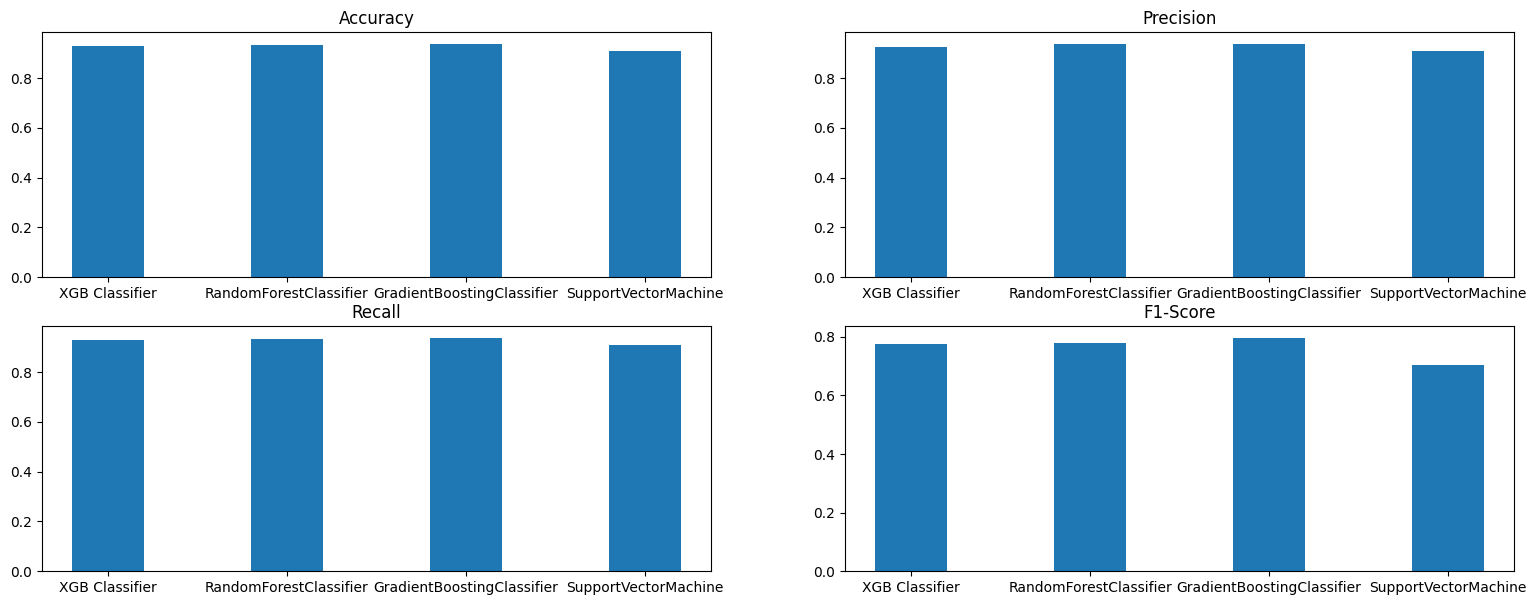

In [ ]:
plt.figure(figsize=(40, 200))
figure, axis = plt.subplots(2, 2, figsize=(19, 7))
X=["XGB Classifier","RandomForestClassifier","GradientBoostingClassifier","SupportVectorMachine"]
Y1=[accuracy1,accuracy2,accuracy3,accuracy4]
Y2=[precision1,precision2,precision3,precision4]
Y3=[recall1,recall2,recall3,recall4]
Y4=[f11,f12,f13,f14]
# For Sine Function
axis[0, 0].bar(X, Y1,width = 0.4)
axis[0, 0].set_title("Accuracy")

# For Cosine Function
axis[0, 1].bar(X, Y2,width = 0.4)
axis[0, 1].set_title("Precision")

# For Tangent Function
axis[1, 0].bar(X, Y3,width = 0.4)
axis[1, 0].set_title("Recall")

# For Tanh Function
axis[1, 1].bar(X, Y4,width = 0.4)
axis[1, 1].set_title("F1-Score")
# Combine all the operations and display
plt.show()

In [ ]:
#Random Forest
X1 = X[["HbA1c_level","blood_glucose_level","age","bmi","smoking_history"]]
y = data['diabetes']
print(X1)
print(y)

      HbA1c_level  blood_glucose_level  age  bmi  smoking_history
0              11                    6   94  367                4
1              11                    0   68  468                0
2               5                    9   42  468                4
3               4                    8   50  282                1
4               3                    8   90  152                1
...           ...                  ...  ...  ...              ...
1494            7                    1   29  296                0
1495            3                   10    5  117                0
1496           12                   10   76  668                4
1497           14                    4   73  576                3
1498            7                   14   68  710                0

[1499 rows x 5 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1494    0
1495    0
1496    1
1497    1
1498    1
Name: diabetes, Length: 1499, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9333333333333333
Precision: 0.9328846153846154
Recall: 0.9333333333333333
True Positives: 37
False Positives: 3
Confusion Matrix:
 [[243   3]
 [ 17  37]]
F1-score: 0.7872340425531915


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.94
Precision: 0.9420570510245078
Recall: 0.94
True Positives: 37
False Positives: 1
Confusion Matrix:
 [[245   1]
 [ 17  37]]
F1-score: 0.8043478260869565


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9366666666666666
Precision: 0.9373592690834069
Recall: 0.9366666666666666
True Positives: 37
False Positives: 2
Confusion Matrix:
 [[244   2]
 [ 17  37]]
F1-score: 0.7956989247311828


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9133333333333333
Precision: 0.9116666666666666
Recall: 0.9133333333333333
True Positives: 32
False Positives: 4
Confusion Matrix:
 [[242   4]
 [ 22  32]]
F1-score: 0.711111111111111


In [ ]:
#XGBClassifier
X[["HbA1c_level","blood_glucose_level","hypertension","age","heart_disease"]]
y = data['diabetes']
print(X1)
print(y)


      HbA1c_level  blood_glucose_level  age  bmi  smoking_history
0              11                    6   94  367                4
1              11                    0   68  468                0
2               5                    9   42  468                4
3               4                    8   50  282                1
4               3                    8   90  152                1
...           ...                  ...  ...  ...              ...
1494            7                    1   29  296                0
1495            3                   10    5  117                0
1496           12                   10   76  668                4
1497           14                    4   73  576                3
1498            7                   14   68  710                0

[1499 rows x 5 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1494    0
1495    0
1496    1
1497    1
1498    1
Name: diabetes, Length: 1499, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9333333333333333
Precision: 0.9328846153846154
Recall: 0.9333333333333333
True Positives: 37
False Positives: 3
Confusion Matrix:
 [[243   3]
 [ 17  37]]
F1-score: 0.7872340425531915


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.94
Precision: 0.9420570510245078
Recall: 0.94
True Positives: 37
False Positives: 1
Confusion Matrix:
 [[245   1]
 [ 17  37]]
F1-score: 0.8043478260869565


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9366666666666666
Precision: 0.9373592690834069
Recall: 0.9366666666666666
True Positives: 37
False Positives: 2
Confusion Matrix:
 [[244   2]
 [ 17  37]]
F1-score: 0.7956989247311828


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9133333333333333
Precision: 0.9116666666666666
Recall: 0.9133333333333333
True Positives: 32
False Positives: 4
Confusion Matrix:
 [[242   4]
 [ 22  32]]
F1-score: 0.711111111111111


In [ ]:
#Gradient Boosting
X[["HbA1c_level","blood_glucose_level","age","bmi","hypertension"]]
y = data['diabetes']
print(X1)
print(y)

      HbA1c_level  blood_glucose_level  age  bmi  smoking_history
0              11                    6   94  367                4
1              11                    0   68  468                0
2               5                    9   42  468                4
3               4                    8   50  282                1
4               3                    8   90  152                1
...           ...                  ...  ...  ...              ...
1494            7                    1   29  296                0
1495            3                   10    5  117                0
1496           12                   10   76  668                4
1497           14                    4   73  576                3
1498            7                   14   68  710                0

[1499 rows x 5 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1494    0
1495    0
1496    1
1497    1
1498    1
Name: diabetes, Length: 1499, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9333333333333333
Precision: 0.9328846153846154
Recall: 0.9333333333333333
True Positives: 37
False Positives: 3
Confusion Matrix:
 [[243   3]
 [ 17  37]]
F1-score: 0.7872340425531915


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.94
Precision: 0.9420570510245078
Recall: 0.94
True Positives: 37
False Positives: 1
Confusion Matrix:
 [[245   1]
 [ 17  37]]
F1-score: 0.8043478260869565


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9366666666666666
Precision: 0.9373592690834069
Recall: 0.9366666666666666
True Positives: 37
False Positives: 2
Confusion Matrix:
 [[244   2]
 [ 17  37]]
F1-score: 0.7956989247311828


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9133333333333333
Precision: 0.9116666666666666
Recall: 0.9133333333333333
True Positives: 32
False Positives: 4
Confusion Matrix:
 [[242   4]
 [ 22  32]]
F1-score: 0.711111111111111


In [ ]:
#SVM
X[["HbA1c_level","blood_glucose_level","age","bmi","hypertension"]]
y = data['diabetes']
print(X1)
print(y)


      HbA1c_level  blood_glucose_level  age  bmi  smoking_history
0              11                    6   94  367                4
1              11                    0   68  468                0
2               5                    9   42  468                4
3               4                    8   50  282                1
4               3                    8   90  152                1
...           ...                  ...  ...  ...              ...
1494            7                    1   29  296                0
1495            3                   10    5  117                0
1496           12                   10   76  668                4
1497           14                    4   73  576                3
1498            7                   14   68  710                0

[1499 rows x 5 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1494    0
1495    0
1496    1
1497    1
1498    1
Name: diabetes, Length: 1499, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9333333333333333
Precision: 0.9328846153846154
Recall: 0.9333333333333333
True Positives: 37
False Positives: 3
Confusion Matrix:
 [[243   3]
 [ 17  37]]
F1-score: 0.7872340425531915


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.94
Precision: 0.9420570510245078
Recall: 0.94
True Positives: 37
False Positives: 1
Confusion Matrix:
 [[245   1]
 [ 17  37]]
F1-score: 0.8043478260869565


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9366666666666666
Precision: 0.9373592690834069
Recall: 0.9366666666666666
True Positives: 37
False Positives: 2
Confusion Matrix:
 [[244   2]
 [ 17  37]]
F1-score: 0.7956989247311828


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9133333333333333
Precision: 0.9116666666666666
Recall: 0.9133333333333333
True Positives: 32
False Positives: 4
Confusion Matrix:
 [[242   4]
 [ 22  32]]
F1-score: 0.711111111111111


In [ ]:
#Linear regression
X1 = X[["hypertension","heart_disease","HbA1c_level","blood_glucose_level","gender"]]
y = data['diabetes']
print(X1)
print(y)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

      hypertension  heart_disease  HbA1c_level  blood_glucose_level  gender
0                0              1           11                    6       0
1                0              0           11                    0       0
2                0              0            5                    9       1
3                0              0            4                    8       0
4                1              1            3                    8       1
...            ...            ...          ...                  ...     ...
1494             0              0            7                    1       1
1495             0              0            3                   10       1
1496             0              0           12                   10       0
1497             0              0           14                    4       1
1498             0              0            7                   14       1

[1499 rows x 5 columns]
0       0
1       0
2       0
3       0
4       0
       ..
149

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9266666666666666
Precision: 0.9245404208194905
Recall: 0.9266666666666666
True Positives: 37
False Positives: 5
Confusion Matrix:
 [[241   5]
 [ 17  37]]
F1-score: 0.7708333333333335


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9333333333333333
Precision: 0.9320044296788482
Recall: 0.9333333333333333
True Positives: 38
False Positives: 4
Confusion Matrix:
 [[242   4]
 [ 16  38]]
F1-score: 0.7916666666666667


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.94
Precision: 0.9440909090909092
Recall: 0.94
True Positives: 36
False Positives: 0
Confusion Matrix:
 [[246   0]
 [ 18  36]]
F1-score: 0.8


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9
Precision: 0.8979477611940299
Recall: 0.9
True Positives: 28
False Positives: 4
Confusion Matrix:
 [[242   4]
 [ 26  28]]
F1-score: 0.6511627906976744


In [ ]:
#Chisquare
X1 = X[["age","hypertension","bmi","HbA1c_level","blood_glucose_level"]]
y = data['diabetes']
print(X1)
print(y)

      age  hypertension  bmi  HbA1c_level  blood_glucose_level
0      94             0  367           11                    6
1      68             0  468           11                    0
2      42             0  468            5                    9
3      50             0  282            4                    8
4      90             1  152            3                    8
...   ...           ...  ...          ...                  ...
1494   29             0  296            7                    1
1495    5             0  117            3                   10
1496   76             0  668           12                   10
1497   73             0  576           14                    4
1498   68             0  710            7                   14

[1499 rows x 5 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1494    0
1495    0
1496    1
1497    1
1498    1
Name: diabetes, Length: 1499, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9233333333333333
Precision: 0.9205490196078432
Recall: 0.9233333333333333
True Positives: 38
False Positives: 7
Confusion Matrix:
 [[239   7]
 [ 16  38]]
F1-score: 0.7676767676767676


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.93
Precision: 0.9296021220159151
Recall: 0.93
True Positives: 36
False Positives: 3
Confusion Matrix:
 [[243   3]
 [ 18  36]]
F1-score: 0.7741935483870968


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9333333333333333
Precision: 0.9341904379268783
Recall: 0.9333333333333333
True Positives: 36
False Positives: 2
Confusion Matrix:
 [[244   2]
 [ 18  36]]
F1-score: 0.782608695652174


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9066666666666666
Precision: 0.90272398553636
Recall: 0.9066666666666666
True Positives: 32
False Positives: 6
Confusion Matrix:
 [[240   6]
 [ 22  32]]
F1-score: 0.6956521739130435


In [ ]:
#fischer's score
X1 = X[["age","hypertension","bmi","HbA1c_level","blood_glucose_level"]]
y = data['diabetes']
print(X1)
print(y)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

      age  hypertension  bmi  HbA1c_level  blood_glucose_level
0      94             0  367           11                    6
1      68             0  468           11                    0
2      42             0  468            5                    9
3      50             0  282            4                    8
4      90             1  152            3                    8
...   ...           ...  ...          ...                  ...
1494   29             0  296            7                    1
1495    5             0  117            3                   10
1496   76             0  668           12                   10
1497   73             0  576           14                    4
1498   68             0  710            7                   14

[1499 rows x 5 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1494    0
1495    0
1496    1
1497    1
1498    1
Name: diabetes, Length: 1499, dtype: int64
F1-score: 0.1818181818181818


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9233333333333333
Precision: 0.9205490196078432
Recall: 0.9233333333333333
True Positives: 38
False Positives: 7
Confusion Matrix:
 [[239   7]
 [ 16  38]]
F1-score: 0.7676767676767676


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.93
Precision: 0.9296021220159151
Recall: 0.93
True Positives: 36
False Positives: 3
Confusion Matrix:
 [[243   3]
 [ 18  36]]
F1-score: 0.7741935483870968


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9333333333333333
Precision: 0.9341904379268783
Recall: 0.9333333333333333
True Positives: 36
False Positives: 2
Confusion Matrix:
 [[244   2]
 [ 18  36]]
F1-score: 0.782608695652174


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9066666666666666
Precision: 0.90272398553636
Recall: 0.9066666666666666
True Positives: 32
False Positives: 6
Confusion Matrix:
 [[240   6]
 [ 22  32]]
F1-score: 0.6956521739130435


In [ ]:
#missing value
X1 = X[["age","hypertension","bmi","HbA1c_level","blood_glucose_level"]]
y = data['diabetes']
print(X1)
print(y)

      age  hypertension  bmi  HbA1c_level  blood_glucose_level
0      94             0  367           11                    6
1      68             0  468           11                    0
2      42             0  468            5                    9
3      50             0  282            4                    8
4      90             1  152            3                    8
...   ...           ...  ...          ...                  ...
1494   29             0  296            7                    1
1495    5             0  117            3                   10
1496   76             0  668           12                   10
1497   73             0  576           14                    4
1498   68             0  710            7                   14

[1499 rows x 5 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1494    0
1495    0
1496    1
1497    1
1498    1
Name: diabetes, Length: 1499, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9233333333333333
Precision: 0.9205490196078432
Recall: 0.9233333333333333
True Positives: 38
False Positives: 7
Confusion Matrix:
 [[239   7]
 [ 16  38]]
F1-score: 0.7676767676767676


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.93
Precision: 0.9296021220159151
Recall: 0.93
True Positives: 36
False Positives: 3
Confusion Matrix:
 [[243   3]
 [ 18  36]]
F1-score: 0.7741935483870968


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9333333333333333
Precision: 0.9341904379268783
Recall: 0.9333333333333333
True Positives: 36
False Positives: 2
Confusion Matrix:
 [[244   2]
 [ 18  36]]
F1-score: 0.782608695652174


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9066666666666666
Precision: 0.90272398553636
Recall: 0.9066666666666666
True Positives: 32
False Positives: 6
Confusion Matrix:
 [[240   6]
 [ 22  32]]
F1-score: 0.6956521739130435


In [ ]:
#information gain
X1 = X[["bmi","HbA1c_level","blood_glucose_level","age","hypertension"]]
y = data['diabetes']
print(X1)
print(y)

      bmi  HbA1c_level  blood_glucose_level  age  hypertension
0     367           11                    6   94             0
1     468           11                    0   68             0
2     468            5                    9   42             0
3     282            4                    8   50             0
4     152            3                    8   90             1
...   ...          ...                  ...  ...           ...
1494  296            7                    1   29             0
1495  117            3                   10    5             0
1496  668           12                   10   76             0
1497  576           14                    4   73             0
1498  710            7                   14   68             0

[1499 rows x 5 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1494    0
1495    0
1496    1
1497    1
1498    1
Name: diabetes, Length: 1499, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9233333333333333
Precision: 0.9205490196078432
Recall: 0.9233333333333333
True Positives: 38
False Positives: 7
Confusion Matrix:
 [[239   7]
 [ 16  38]]
F1-score: 0.7676767676767676


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9266666666666666
Precision: 0.9252307692307693
Recall: 0.9266666666666666
True Positives: 36
False Positives: 4
Confusion Matrix:
 [[242   4]
 [ 18  36]]
F1-score: 0.7659574468085106


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9333333333333333
Precision: 0.9341904379268783
Recall: 0.9333333333333333
True Positives: 36
False Positives: 2
Confusion Matrix:
 [[244   2]
 [ 18  36]]
F1-score: 0.782608695652174


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9066666666666666
Precision: 0.90272398553636
Recall: 0.9066666666666666
True Positives: 32
False Positives: 6
Confusion Matrix:
 [[240   6]
 [ 22  32]]
F1-score: 0.6956521739130435


In [ ]:
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)
feature_names=list(X_train.columns)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create and train a machine learning model (e.g., RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize a LIME explainer
explainer = LimeTabularExplainer(X_train.values, feature_names =feature_names,mode = 'classification')


instance_idx = 13  # Change this to the index of the instance you want to explain

# Explain the model's prediction for the selected instance
#explanation = explainer.explain_instance(X_test.values[instance_idx], model.predict_proba, num_features=len(X.columns))
explanation = explainer.explain_instance(X_test.values[instance_idx], model.predict_proba, num_features=6)

# Print the explanation
explanation.show_in_notebook()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Variable Importance Plot - Global Interpretation


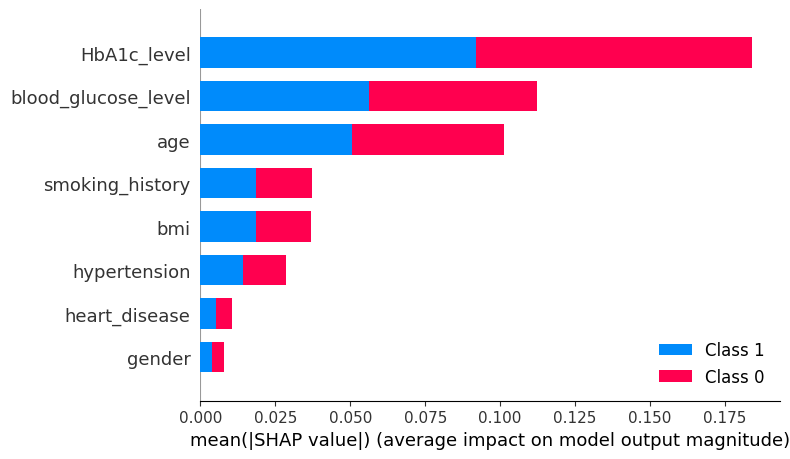

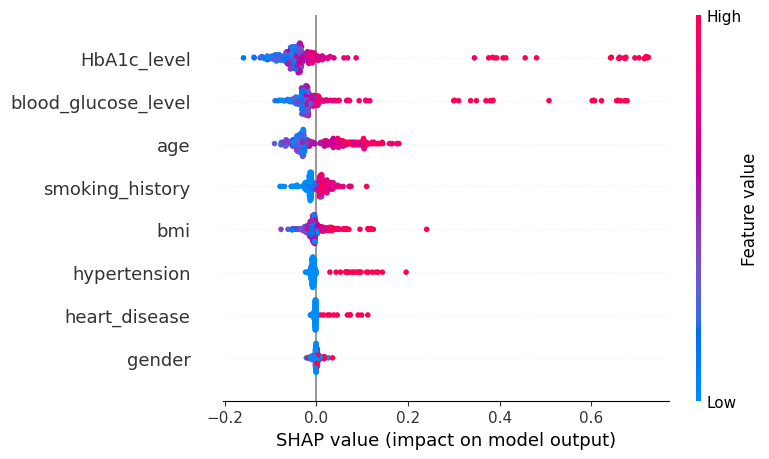

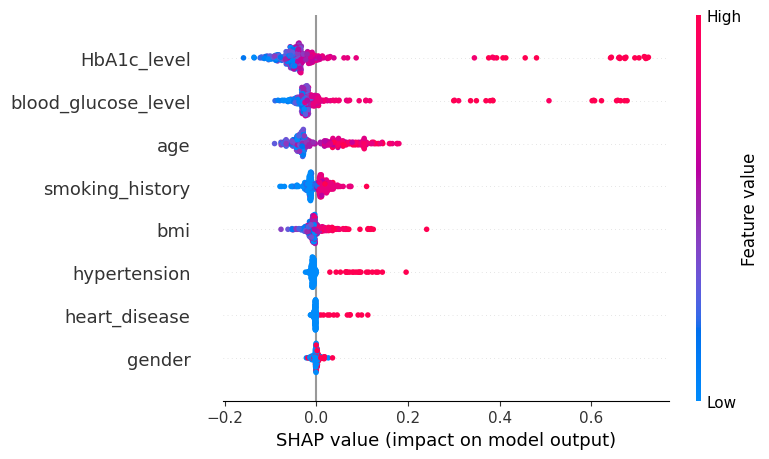

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a machine learning model (e.g., RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize a SHAP explainer
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

shap.summary_plot(shap_values[1], X_test)


shap.summary_plot(shap_values[1], X_test)
